# UAS MPML 
### NAMA: MUTHIA RAHMATUN NISA'
### NIM: 23611097

# Dataset Selection and Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Memuat dataset
try:
    df = pd.read_csv('onlinefoods.csv')
except FileNotFoundError:
    print("Error: File 'onlinefoods.csv' tidak ditemukan.")
    exit()

# Membersihkan data: Menghapus kolom 'Unnamed: 12' yang duplikat
if 'Unnamed: 12' in df.columns:
    df = df.drop(columns=['Unnamed: 12'])

print("--- Ringkasan Dataset ---")
print("Menampilkan 5 baris pertama:")
print(df.head())
print("\nInformasi dasar dataset:")
df.info()
print("-" * 50)


--- Ringkasan Dataset ---
Menampilkan 5 baris pertama:
   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback  
0    Yes   Positive  
1    Yes   Positive  
2    Yes  Negative   
3    Yes   Positive  
4    Yes   Positi

Visualisasi Data (EDA)


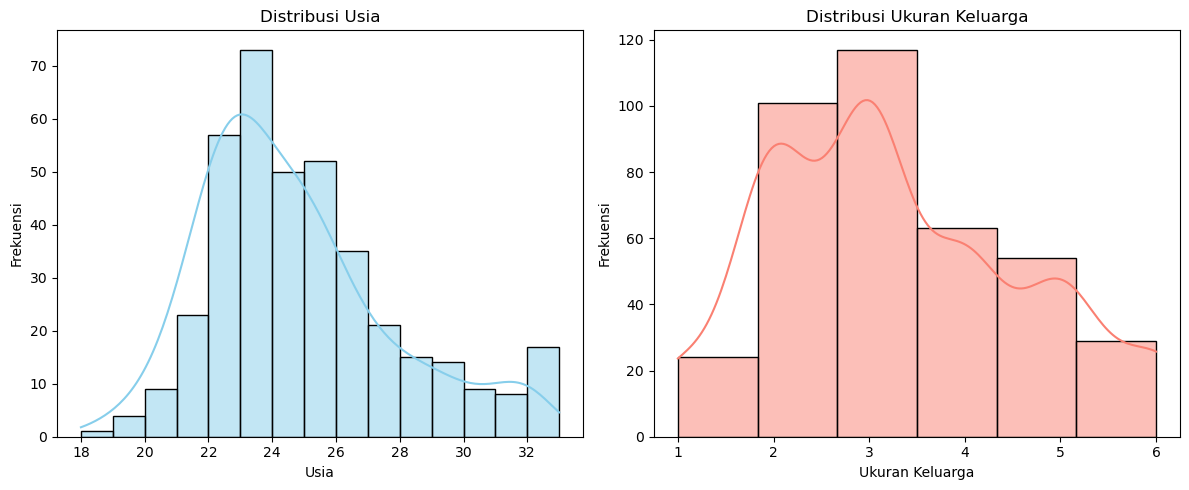

In [2]:
# Visualisasi untuk memahami distribusi data
print("Visualisasi Data (EDA)")

# Histogram untuk kolom numerik (Age, Family size)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.histplot(df['Family size'], bins=6, kde=True, color='salmon')
plt.title('Distribusi Ukuran Keluarga')
plt.xlabel('Ukuran Keluarga')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()


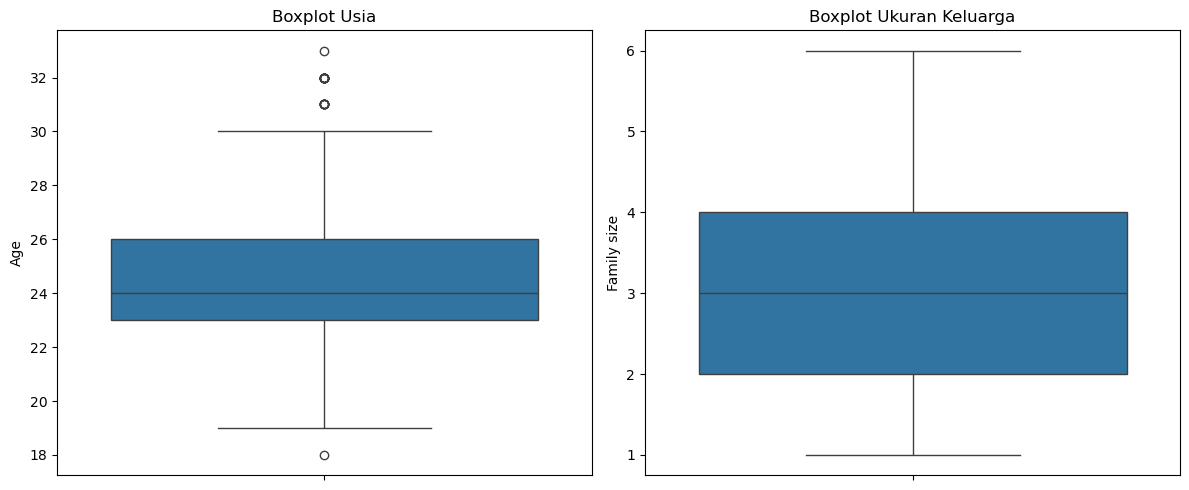

In [3]:
# Boxplot untuk mendeteksi outlier pada kolom numerik
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot Usia')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Family size'])
plt.title('Boxplot Ukuran Keluarga')
plt.tight_layout()
plt.show()

In [4]:
# Korelasi antar variabel numerik menggunakan Heatmap
print("Matriks Korelasi antar variabel numerik:")
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

Matriks Korelasi antar variabel numerik:
                  Age  Family size  latitude  longitude  Pin code
Age          1.000000     0.169982  0.006595   0.047500  0.137294
Family size  0.169982     1.000000 -0.053537   0.070126 -0.009402
latitude     0.006595    -0.053537  1.000000  -0.144234 -0.201813
longitude    0.047500     0.070126 -0.144234   1.000000  0.156119
Pin code     0.137294    -0.009402 -0.201813   0.156119  1.000000


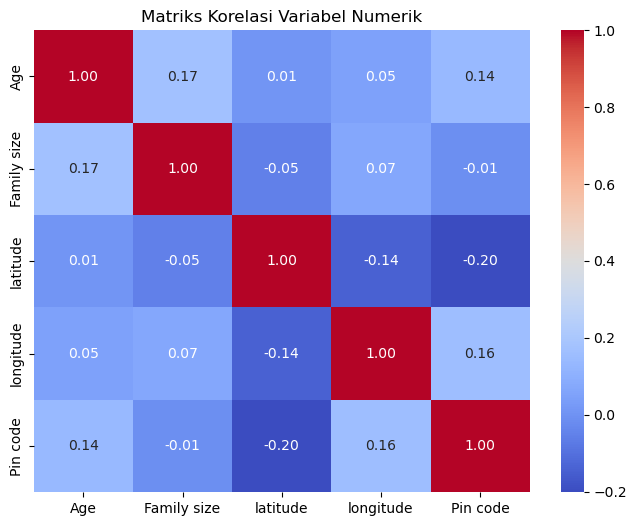

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

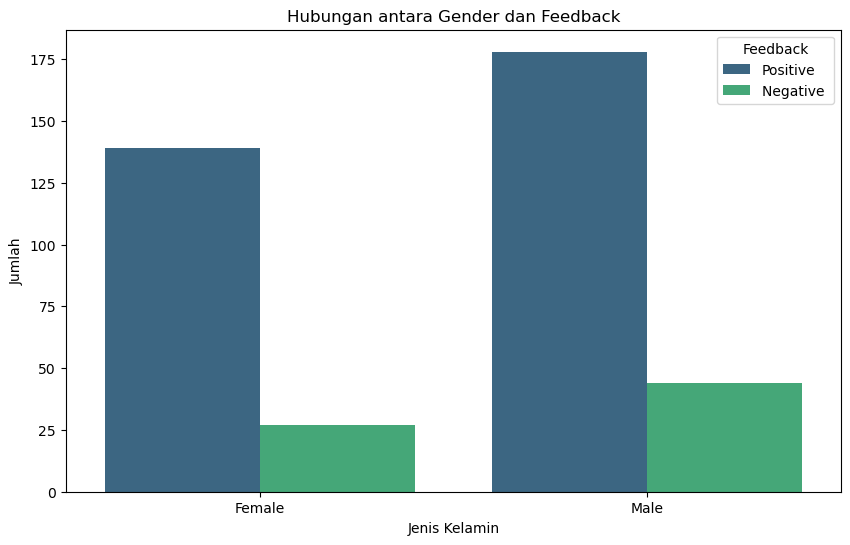

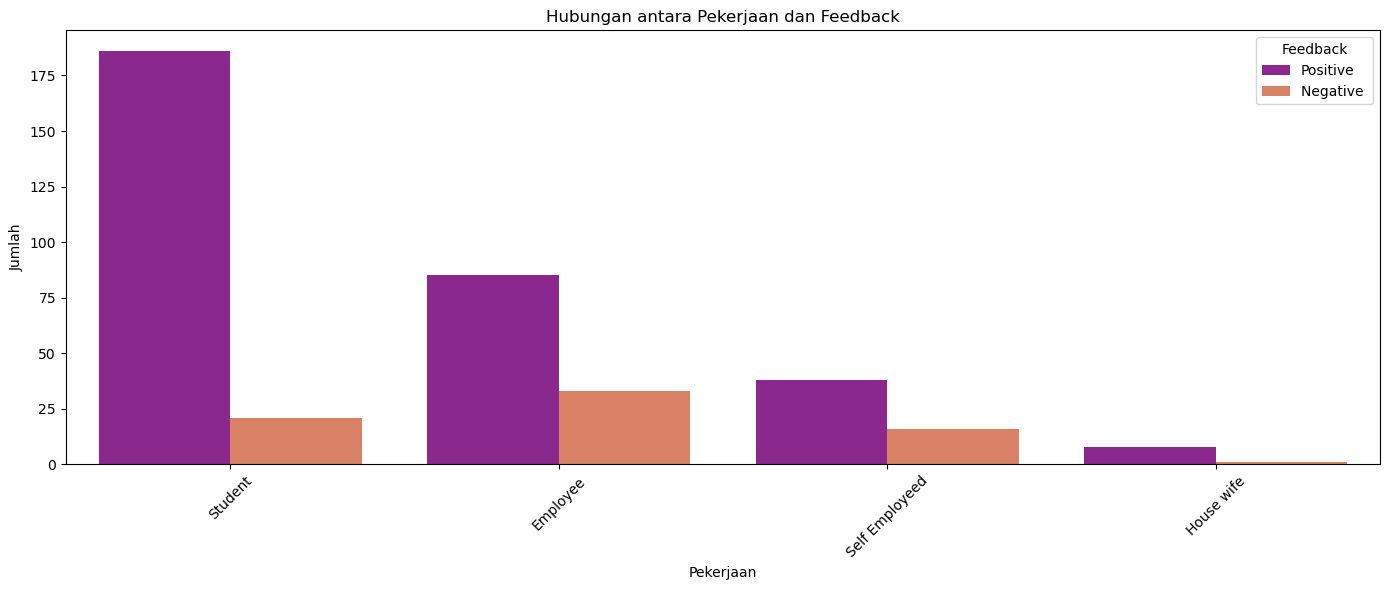

In [6]:
# Visualisasi hubungan antar variabel kategorikal
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Feedback', palette='viridis')
plt.title('Hubungan antara Gender dan Feedback')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Occupation', hue='Feedback', palette='plasma')
plt.title('Hubungan antara Pekerjaan dan Feedback')
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

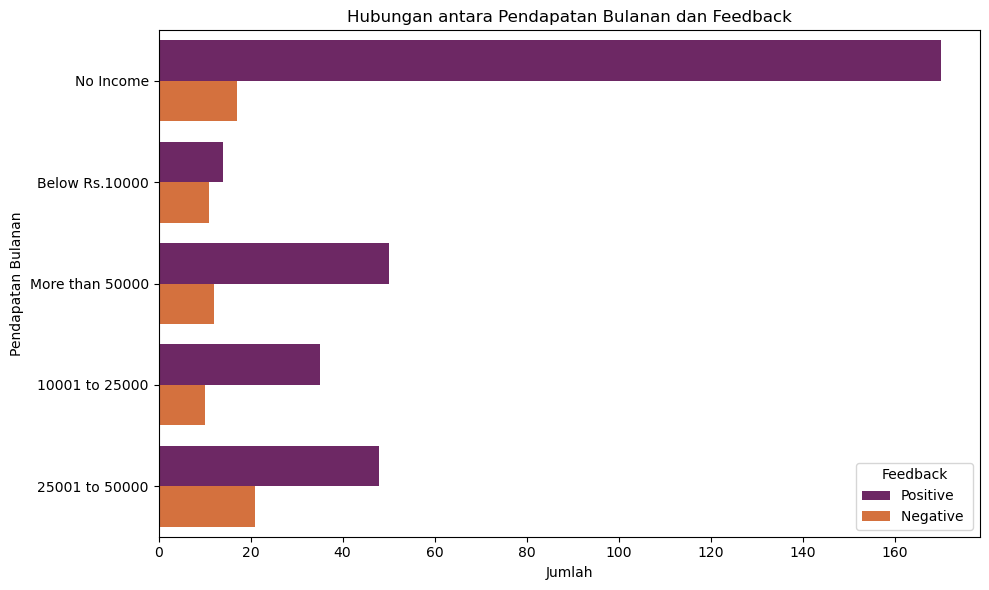

In [7]:
# Distribusi 'Monthly Income'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Monthly Income', hue='Feedback', palette='inferno')
plt.title('Hubungan antara Pendapatan Bulanan dan Feedback')
plt.xlabel('Jumlah')
plt.ylabel('Pendapatan Bulanan')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [8]:
# Penanganan Kolom Tidak Relevan 
# Menghapus kolom 'Unnamed: 12' 
if 'Unnamed: 12' in df.columns:
    df = df.drop(columns=['Unnamed: 12'])
    print("Kolom 'Unnamed: 12' telah dihapus.")

In [9]:
# Definisi Fitur (X) dan Target (y) 
X = df.drop('Feedback', axis=1)
y = df['Feedback']

In [10]:
# Encoding Variabel Target (LabelEncoder) 
# Mengubah 'Positive' dan 'Negative' menjadi 0 dan 1
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("\nVariabel target 'Feedback' telah di-encode:")
print(f"Mapping: {list(label_encoder.classes_)} -> {list(range(len(label_encoder.classes_)))}")


Variabel target 'Feedback' telah di-encode:
Mapping: ['Negative ', 'Positive'] -> [0, 1]


In [11]:
# Identifikasi Kolom Numerik dan Kategorikal 
# Kolom numerik
numeric_features = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

# Kolom kategorikal 
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nFitur Numerik: {numeric_features}")
print(f"Fitur Kategorikal: {categorical_features}")



Fitur Numerik: ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']
Fitur Kategorikal: ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output']


In [12]:
# Membuat Preprocessing Pipeline dengan ColumnTransformer 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [13]:
# Training dan Testing Set
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nUkuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")


Ukuran X_train: (310, 11)
Ukuran X_test: (78, 11)
Ukuran y_train: (310,)
Ukuran y_test: (78,)


In [14]:
# Menerapkan Preprocessing ke Data Training dan Testing --
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test) 

print("\nShape X_train setelah preprocessing:", X_train_processed.shape)
print("Shape X_test setelah preprocessing:", X_test_processed.shape)


Shape X_train setelah preprocessing: (310, 26)
Shape X_test setelah preprocessing: (78, 26)


In [15]:
# Melihat nama kolom setelah one-hot encoding 
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_processed_features = numeric_features + list(ohe_feature_names)
print(f"\nJumlah fitur setelah preprocessing: {len(all_processed_features)}")
print("Nama fitur setelah preprocessing:")
print(all_processed_features[:10])  


Jumlah fitur setelah preprocessing: 26
Nama fitur setelah preprocessing:
['Age', 'Family size', 'latitude', 'longitude', 'Pin code', 'Gender_Female', 'Gender_Male', 'Marital Status_Married', 'Marital Status_Prefer not to say', 'Marital Status_Single']


# Model Training and Comparison

In [16]:
import joblib
# Dictionary untuk menyimpan hasil evaluasi model
results = {}
best_params = {}

In [17]:
# Decision Tree Classifier 
print("\n--- Melatih Decision Tree Classifier ---")
dt_classifier = DecisionTreeClassifier(random_state=42)

# Hyperparameter Tuning untuk Decision Tree
dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(dt_classifier, dt_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train_processed, y_train)

best_dt_model = grid_search_dt.best_estimator_
best_params['Decision Tree'] = grid_search_dt.best_params_
print(f"Best Parameters (Decision Tree): {grid_search_dt.best_params_}")


--- Melatih Decision Tree Classifier ---
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters (Decision Tree): {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [18]:
# Evaluasi Model Decision Tree
y_pred_dt = best_dt_model.predict(X_test_processed)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

results['Decision Tree'] = {
    'Accuracy': accuracy_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1-Score': f1_dt
}
print(f"Accuracy (Decision Tree): {accuracy_dt:.4f}")
print(f"F1-Score (Decision Tree): {f1_dt:.4f}")
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))

Accuracy (Decision Tree): 0.8462
F1-Score (Decision Tree): 0.8462

Classification Report (Decision Tree):
               precision    recall  f1-score   support

   Negative        0.57      0.57      0.57        14
    Positive       0.91      0.91      0.91        64

    accuracy                           0.85        78
   macro avg       0.74      0.74      0.74        78
weighted avg       0.85      0.85      0.85        78

Confusion Matrix (Decision Tree):
 [[ 8  6]
 [ 6 58]]


In [20]:
# Support Vector Machine (SVC)
print("\nMelatih Support Vector Machine (SVC)")
svc_classifier = SVC(random_state=42)

# Hyperparameter Tuning untuk SVC
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search_svc = GridSearchCV(svc_classifier, svc_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search_svc.fit(X_train_processed, y_train)

best_svc_model = grid_search_svc.best_estimator_
best_params['SVC'] = grid_search_svc.best_params_
print(f"Best Parameters (SVC): {grid_search_svc.best_params_}")


Melatih Support Vector Machine (SVC)
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters (SVC): {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [21]:
# Evaluasi Model SVC
y_pred_svc = best_svc_model.predict(X_test_processed)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')

results['SVC'] = {
    'Accuracy': accuracy_svc,
    'Precision': precision_svc,
    'Recall': recall_svc,
    'F1-Score': f1_svc
}
print(f"Accuracy (SVC): {accuracy_svc:.4f}")
print(f"F1-Score (SVC): {f1_svc:.4f}")
print("\nClassification Report (SVC):\n", classification_report(y_test, y_pred_svc, target_names=label_encoder.classes_))
print("Confusion Matrix (SVC):\n", confusion_matrix(y_test, y_pred_svc))


Accuracy (SVC): 0.8333
F1-Score (SVC): 0.8252

Classification Report (SVC):
               precision    recall  f1-score   support

   Negative        0.55      0.43      0.48        14
    Positive       0.88      0.92      0.90        64

    accuracy                           0.83        78
   macro avg       0.71      0.68      0.69        78
weighted avg       0.82      0.83      0.83        78

Confusion Matrix (SVC):
 [[ 6  8]
 [ 5 59]]


In [23]:
# KNN
print("\nMelatih KNN Classifier ")
knn_classifier = KNeighborsClassifier()

# Hyperparameter Tuning untuk KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(knn_classifier, knn_param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search_knn.fit(X_train_processed, y_train)

best_knn_model = grid_search_knn.best_estimator_
best_params['KNN'] = grid_search_knn.best_params_
print(f"Best Parameters (KNN): {grid_search_knn.best_params_}")


Melatih KNN Classifier 
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters (KNN): {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [24]:
# Evaluasi Model KNN
y_pred_knn = best_knn_model.predict(X_test_processed)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

results['KNN'] = {
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1-Score': f1_knn
}
print(f"Accuracy (KNN): {accuracy_knn:.4f}")
print(f"F1-Score (KNN): {f1_knn:.4f}")
print("\nClassification Report (KNN):\n", classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))
print("Confusion Matrix (KNN):\n", confusion_matrix(y_test, y_pred_knn))

Accuracy (KNN): 0.8462
F1-Score (KNN): 0.8286

Classification Report (KNN):
               precision    recall  f1-score   support

   Negative        0.62      0.36      0.45        14
    Positive       0.87      0.95      0.91        64

    accuracy                           0.85        78
   macro avg       0.75      0.66      0.68        78
weighted avg       0.83      0.85      0.83        78

Confusion Matrix (KNN):
 [[ 5  9]
 [ 3 61]]



Perbandingan Kinerja Model
               Accuracy  Precision    Recall  F1-Score
Decision Tree  0.846154   0.846154  0.846154  0.846154
SVC            0.833333   0.820443  0.833333  0.825242
KNN            0.846154   0.827198  0.846154  0.828619


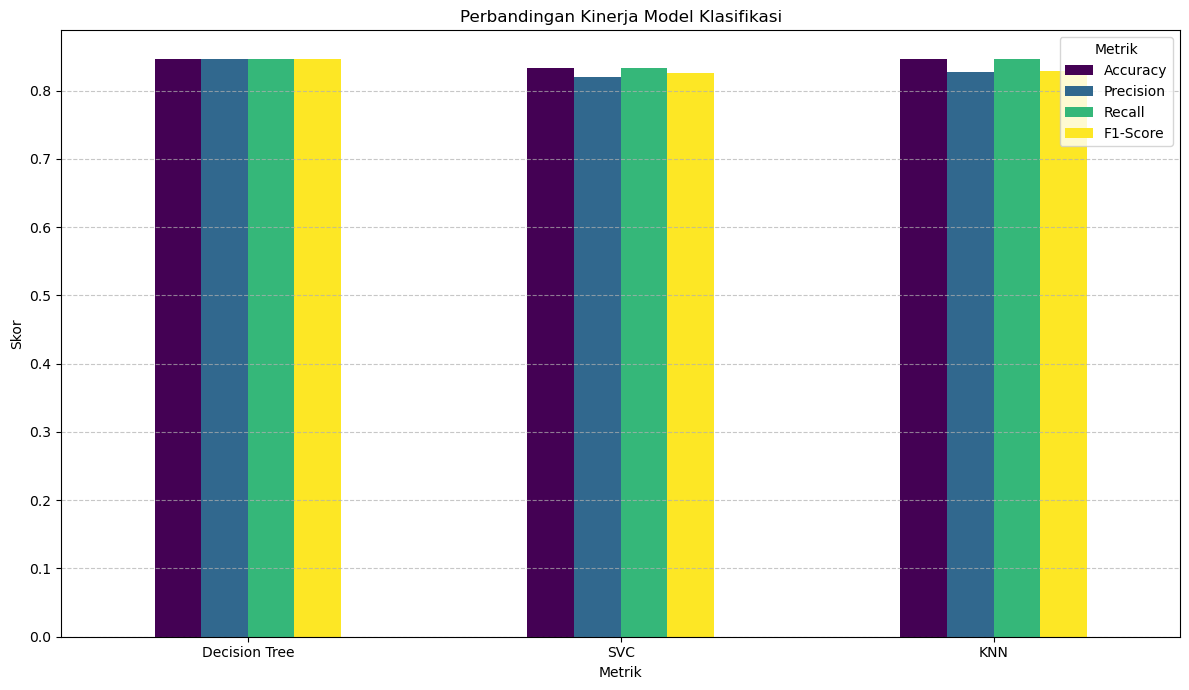

In [26]:
#  Visualisasi Perbandingan Kinerja Model 
print("\nPerbandingan Kinerja Model")
results_df = pd.DataFrame(results).T 
print(results_df)

results_df.plot(kind='bar', figsize=(12, 7), colormap='viridis')
plt.title('Perbandingan Kinerja Model Klasifikasi')
plt.ylabel('Skor')
plt.xlabel('Metrik')
plt.xticks(rotation=0)
plt.legend(title='Metrik')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [27]:
print("\nBest Parameters Found for Each Model")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")


Best Parameters Found for Each Model
Decision Tree: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
